# Support Vector Machine

Support Vector Machines (SVM) is a powerful supervised learning algorithm used for both classification and regression tasks. SVM aims to find the optimal hyperplane that best separates the data into different classes.

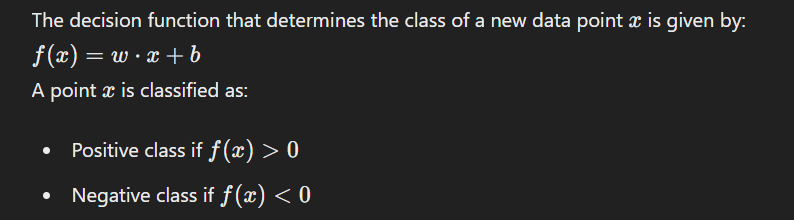

In [3]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        """
        Initialize the SVM model with hyperparameters.

        Parameters:
        learning_rate (float): The step size for gradient descent.
        lambda_param (float): The regularization parameter.
        n_iters (int): The number of iterations to run gradient descent.
        """
        self.learning_rate = learning_rate  # Learning rate for gradient descent
        self.lambda_param = lambda_param    # Regularization parameter to avoid overfitting
        self.n_iters = n_iters              # Number of iterations for training
        self.w = None  # Weights vector
        self.b = None  # Bias term

    def fit(self, X, y):
        """
        Train the SVM model using the input data X and labels y.

        Parameters:
        X (numpy.ndarray): Training data of shape (n_samples, n_features).
        y (numpy.ndarray): Labels for the training data of shape (n_samples,).
        """
        n_samples, n_features = X.shape  # Number of samples and features

        # Convert labels to -1 or 1
        y_ = np.where(y <= 0, -1, 1)

        # Initialize weights and bias to zero
        self.w = np.zeros(n_features)
        self.b = 0

        # Gradient descent algorithm
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                # Check the condition y_i * (w . x_i - b) >= 1
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    # Update weights for correctly classified points with regularization
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
                else:
                    # Update weights and bias for misclassified points
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.learning_rate * y_[idx]

    def predict(self, X):
        """
        Predict the class labels for input data X.

        Parameters:
        X (numpy.ndarray): Input data of shape (n_samples, n_features).

        Returns:
        numpy.ndarray: Predicted class labels.
        """
        # Calculate the linear combination of weights and features minus the bias
        approx = np.dot(X, self.w) - self.b
        # Return the sign of the result to get the predicted class labels (-1 or 1)
        return np.sign(approx)




In [17]:
if __name__ == "__main__":
    # Example data
    X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
    y = np.array([1, 1, -1, -1])

    # Initialize the SVM model
    svm = SVM(learning_rate=0.001, lambda_param=0.001, n_iters=1000)

    # Train the model
    svm.fit(X, y)

    # Predict the labels for training data
    y_pred = svm.predict(X)

    # Calculate confusion matrix and classification report
    cm = confusion_matrix(y, y_pred)
    cr = classification_report(y, y_pred)

    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(cr)

Confusion Matrix:
[[2 0]
 [1 1]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



### Scikit-Learn Library

In [11]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Training data
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
y = np.array([1, 1, -1, -1])

# Create SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the classifier
svm_classifier.fit(X, y)

# Predictions on training data
y_pred = svm_classifier.predict(X)

# Confusion matrix
cm = confusion_matrix(y, y_pred)

# Classification report
report = classification_report(y, y_pred)

print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(report)


Confusion Matrix:
[[2 0]
 [0 2]]
Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

